# Understanding International Aid 
# and It's Impact on Health 

#### Project Proposal for cs169
#### by Ruchir Patel

### Goals

Goal 1. I want to primarily look at International Aid data to analyse where is the money coming from, and where it is going. 
 

For example, 

India receives a few billion dollars a year in Aid. India also gives a few Billion Dollar in Aids to neighbouring countries. I want to analyse & visualize where the flow originates. 

Goal 2. Furthermore, I would like to find Aid data intended specifically for Health and measure the impact.

Goal 3. If time permits, I would also like to study the impact of aid by looking at correlation between trade & aid, to child mortality rates, poverty rates, and malaria rates in India and African Countries.

### Datasets

I want to start with UN Dataset, and US Aid datasets. Build a network, where each node is a country, and visualize the quantified world. 

1. https://www.foreignassistance.gov/explore
2. https://comtrade.un.org
3. World Bank official Aid Received: http://data.un.org/Data.aspx?q=Official+Development+Assistance&d=WDI&f=Indicator_Code%3aDT.ODA.ALLD.CD
4. Bill & Melinda Gates Foundation dataset and result

### Questions

1. Where the money is coming from and where is it going?
2. Does spending more money actually decrease the disease rates, decrease poverty? 
3. Can effects of independent foundations like Bill & Melinda Gates Foundation be measured?
4. Are the rates of Malaria, Polio, and Child Mortality related to Trade, or Aid money?

### Related work

1. Official Stastical Report: http://www.oecd.org/dac/financing-sustainable-development/development-finance-data/ODA-2016-detailed-summary.pdf

2. http://aiddata.org/publications/apples-and-dragon-fruits-the-determinants-of-aid-and-other-forms-of-state-financing-from-china-to-africa-2

Non Western Countries have wide veriety of economic activities, and above paper looks into China's Official Development Assistence, and more commercially oriented sources of financing like debt financing for infrastructure and commerce. I would like to do similar analysis for India and Aid data. 

### Webpage 

https://ruchir594.github.io/cs169/

139
(139, 4)
(139, 4)
(139, 2)


/Users/ruchir/p1/lib/python2.7/site-packages/ipykernel_launcher.py:147: RuntimeWarning: divide by zero encountered in divide


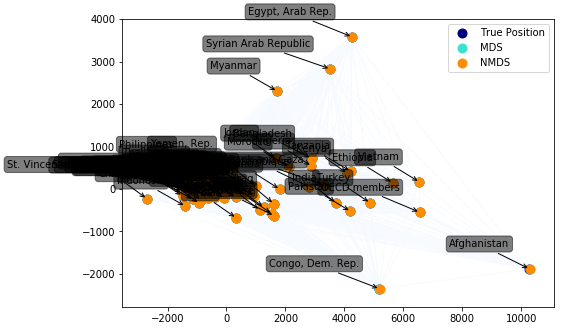

20
(19, 4)
(19, 4)
(19, 2)


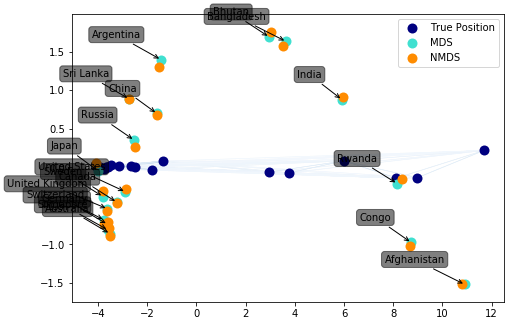

In [17]:
# ------------------------------
# ---
# ---
# * Maybe be run this twice to see the plotted graph, for some reason, it shows up if you run again. 
# Reference/Base Code from: http://scikit-learn.org/stable/auto_examples/manifold/plot_mds.html

def mds(filename, filt, ignore, flag='Aid'):
    import numpy as np
    #import pandas as pd

    from matplotlib import pyplot as plt
    from matplotlib.collections import LineCollection

    from sklearn import manifold
    from sklearn.metrics import euclidean_distances
    from sklearn.decomposition import PCA

    n_samples = 20

    import csv
    with open(filename, 'rb') as f:
        sr = csv.reader(f, delimiter=',')
        data = []
        for e in sr:
            data.append(e)

    # data is data of all countries
    
    countries = []
    data3years = []
    for e in data:
        if len(e) < 3:
            temp = True # Do nothing
            #print e
        if filt != []:
            if len(e)>=4 and e[2] == '2014' and e[0] in filt:
                data3years.append([float(e[3])])
                countries.append(e[0])
        else:
            if len(e)>=3 and e[1] == '2014' and e[0] not in ignore:
                data3years.append([float(e[2])/1000000])
                countries.append(e[0])
                
    n_samples = len(countries)
    if flag == 'Child':
        countries.append('placeholder')
        i=0
        for e in data:
            if len(e) >=3 and e[2] == '2013' and countries[i] == e[0]:
                data3years[i].append(float(e[3]))
                i+=1
        i=0
        for e in data:
            if len(e) >=3 and e[2] == '2012' and countries[i] == e[0]:
                data3years[i].append(float(e[3]))
                i+=1

        i=0
        for e in data:
            if len(e) >=3 and e[2] == '2011' and countries[i] == e[0]:
                data3years[i].append(float(e[3]))
                i+=1
    else:
        i=0
        for e in data:
            if len(e) >=3 and e[1] == '2013' and countries[i] == e[0]:
                data3years[i].append(float(e[2])/1000000)
                i+=1
        i=0
        for e in data:
            if len(e) >=3 and e[1] == '2012' and countries[i] == e[0]:
                data3years[i].append(float(e[2])/1000000)
                i+=1

        i=0
        for e in data:
            if len(e) >=3 and e[1] == '2011' and countries[i] == e[0]:
                data3years[i].append(float(e[2])/1000000)
                i+=1
    data3years = np.array(data3years)

    print len(countries)
    print data3years.shape
    #countries = [chr(ord('A')+i) for i in range(20)]



    import sys
    #sys.exit()

    seed = np.random.RandomState(seed=3)
    X_true = seed.randint(0, 20, 4 * n_samples).astype(np.float)
    X_true = X_true.reshape((n_samples, 4))
    X_true = data3years
    
    print X_true.shape#, X_true
    # Center the data
    X_true -= X_true.mean()

    similarities = euclidean_distances(X_true)

    # Add noise to the similarities
    noise = np.random.rand(n_samples, n_samples)
    noise = noise + noise.T
    noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
    similarities += noise

    mds = manifold.MDS(n_components=4, max_iter=3000, eps=1e-9, random_state=seed,
                       dissimilarity="precomputed", n_jobs=1)
    pos = mds.fit(similarities).embedding_

    nmds = manifold.MDS(n_components=4, metric=False, max_iter=3000, eps=1e-12,
                        dissimilarity="precomputed", random_state=seed, n_jobs=1,
                        n_init=1)
    npos = nmds.fit_transform(similarities, init=pos)

    # Rescale the data
    pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
    npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

    # Rotate the data
    clf = PCA(n_components=2)
    X_true = clf.fit_transform(X_true)
    print X_true.shape
    pos = clf.fit_transform(pos)

    npos = clf.fit_transform(npos)

    fig = plt.figure(1)
    ax = plt.axes([0., 0., 1., 1.])

    s = 100
    plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0,
                label='True Position')
    plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
    plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
    plt.legend(scatterpoints=1, loc='best', shadow=False)

    for label, x, y in zip(countries, pos[:, 0], pos[:, 1]):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-20, 20),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.3', fc='black', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

    similarities = similarities.max() / similarities * 100
    similarities[np.isinf(similarities)] = 0

    # Plot the edges
    start_idx, end_idx = np.where(pos)
    # a sequence of (*line0*, *line1*, *line2*), where::
    #            linen = (x0, y0), (x1, y1), ... (xm, ym)
    segments = [[X_true[i, :], X_true[j, :]]
                for i in range(len(pos)) for j in range(len(pos))]
    values = np.abs(similarities)
    lc = LineCollection(segments,
                        zorder=0, cmap=plt.cm.Blues,
                        norm=plt.Normalize(0, values.max()))
    lc.set_array(similarities.flatten())
    lc.set_linewidths(0.5 * np.ones(len(segments)))
    ax.add_collection(lc)

    plt.show()

mds(filename = 'data/UNdata_aid_received.csv', filt = [], ignore = ["Euro area", "European Union", "North America", "Low & middle income",
    "Arab World", "East Asia & Pacific (all income levels)", "East Asia & Pacific (developing only)",
    "Europe & Central Asia (all income levels)",
    "Europe & Central Asia (developing only)", "High income", "Latin America & Caribbean (all income levels)",
    "Latin America & Caribbean (developing only)", "world", "Middle income", "Low income", "Lower middle income",
    "Middle East & North Africa (all income levels)", "Middle East & North Africa (developing only)",
    "Sub-Saharan Africa (all income levels)", "Sub-Saharan Africa (developing only)",
    "Upper middle income", "World", "Heavily indebted poor countries (HIPC)", "South Asia",
    "Least developed countries: UN classification"])

mds(filename = 'data/child-mortality.csv', filt = ['Afghanistan', 'Argentina', 'Australia', 'Bangladesh', 'Bhutan', 'Canada',
        'China', 'Congo', 'Germany', 'India', 'Japan', 'Russia', 'Rwanda','Singapore', 'Sri Lanka', 'Sweden',
        'Switzerland', 'United Kingdom', 'United States'], ignore = [], flag='Child')

# In Depth Case studies 


20
20
(19, 11)
(19, 11)
(19, 2)


/Users/ruchir/p1/lib/python2.7/site-packages/ipykernel_launcher.py:115: RuntimeWarning: divide by zero encountered in divide


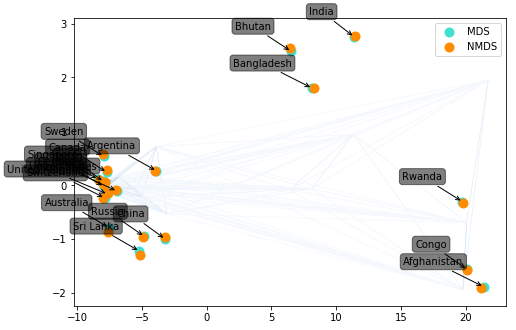

In [2]:


import numpy as np
#import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

n_samples = 20

import csv
with open('data/child-mortality.csv', 'rb') as f:
    sr = csv.reader(f, delimiter=',')
    data = []
    for e in sr:
        data.append(e)

# data is data of all countries
ignore = []
filter = ['Afghanistan', 'Argentina', 'Australia', 'Bangladesh', 'Bhutan', 'Canada',
        'China', 'Congo', 'Germany', 'India', 'Japan', 'Russia', 'Rwanda','Singapore', 'Sri Lanka', 'Sweden',
        'Switzerland', 'United Kingdom', 'United States']
countries = []
data3years = []
for e in data:
    if len(e) < 3:
        temp = True # Do nothing
        #print e
    if len(e)>=4 and e[2] == '2014' and e[0] in filter:
        data3years.append([float(e[3])])
        countries.append(e[0])

countries.append('placeholder')
print len(countries)

years = ['2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004']
for year in years:
    i=0
    for e in data:
        if len(e) >=3 and e[2] == year and countries[i] == e[0]:
            data3years[i].append(float(e[3]))
            i+=1

data3years = np.array(data3years)
n_components = len(years)+1
print len(countries)
print data3years.shape
#countries = [chr(ord('A')+i) for i in range(20)]



import sys
#sys.exit()

seed = np.random.RandomState(seed=3)

X_true = data3years
n_samples = len(countries)-1

print X_true.shape
# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(X_true)

# Add noise to the similarities
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise

mds = manifold.MDS(n_components=n_components, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=n_components, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)
print X_true.shape
pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100
#plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0,
#            label='True Position')
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

for label, x, y in zip(countries, pos[:, 0], pos[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.3', fc='black', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0

# Plot the edges
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[X_true[i, :], X_true[j, :]]
            for i in range(len(pos)) for j in range(len(pos))]
values = np.abs(similarities)
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.Blues,
                    norm=plt.Normalize(0, values.max()))
lc.set_array(similarities.flatten())
lc.set_linewidths(0.5 * np.ones(len(segments)))
ax.add_collection(lc)

plt.show()
